# Invesitgate job satisfaction of developers using stackoverflow 2017 survey data

This is the original code I used to analyze the stackoverflow 2017 survey data. For more detailed explanation, please visit my website.
https://shuyanmei.github.io/posts/third-post/

In [2]:
####Import python libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

## Step 1: Import Data and Data Manipulation

In [3]:
###first import the dataset and check the first few lines of the data
survey=pd.read_csv("./developer_survey_2017/survey_results_public.csv")
survey.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
####clean the data of job satisfaction, only keep the ones without NA
survey = survey[survey['JobSatisfaction'].notnull()]

In [6]:
####count the job satisfaction rate
js=survey['JobSatisfaction'].value_counts().reset_index()
js=pd.DataFrame(js)
js

,index,JobSatisfaction
0,8.0,8983
1,7.0,7969
2,9.0,5573
3,6.0,4726
4,10.0,4148
5,5.0,3749
6,4.0,1865
7,3.0,1635
8,2.0,888
9,0.0,467


In [7]:
#### count the percentage of each job satisfcation rate and round it to 2 digits
total_count=js.JobSatisfaction.sum()
percentage=js['JobSatisfaction']/total_count
js['percentage']=round(percentage*100,2).apply(lambda x : str(x) + '%')
js

,index,JobSatisfaction,percentage
0,8.0,8983,22.25%
1,7.0,7969,19.74%
2,9.0,5573,13.8%
3,6.0,4726,11.7%
4,10.0,4148,10.27%
5,5.0,3749,9.29%
6,4.0,1865,4.62%
7,3.0,1635,4.05%
8,2.0,888,2.2%
9,0.0,467,1.16%


## Step 2: Create functions for Top 3 box and visualization

Why use the top 3 box?

There are a couple of reasons I used top 3 box here to do the analysis. The original variable is a ten point scale rating.

1) It is simple. Instead of 10 numbers, I only need to focus on one number.


2) It is easy to do the comparisons. Top 3 box allows me to compare results really quick. I can use a simple table to see the comparisons.


In [9]:
def calculate_t3b(js):
    """
    input: a dataset with a rating variable 
    top 3 box is defined as sum of counts of 10,9 and 8 over the total count in a ten point scale
    output:percentage and total count 
    """
    t3b_count=js.loc[js['index']>=8,['JobSatisfaction']].sum()
    total_count=js['JobSatisfaction'].sum()
    perct=t3b_count/total_count
    return ([float(perct),total_count])

In [10]:
#### create a bar plot function, you can input the x,y and rotation degree of the label, and plot size
def bar_plot(x,y,rot,size_y):
    """
    input: 
        x: x is the category, could be professional or country in this case
        y: top 3 box score
        rot: the rotation degree of the x axis
        size_y: the y axis size of the plot
    output: the bar plot 
    """
    y_pos = np.arange(len(x))
    plt.figure(figsize=(size_y,4))
    plt.bar(y_pos, y, align='center', alpha=0.5)
    plt.xticks(y_pos, x,rotation=rot)
    plt.ylabel('Tob 3 Box Percentage')
    plt.show()

## Step 3 :Calculate the top 3 box and total count by professional and country and visualization

In [11]:
####top 3 box by professional, here I calculate the top 3 box and total count by professional 
###and the professional developer has the highest job satisfaction
profession=survey['Professional'].unique()
t3b_perct_prof=[]
total_cnt_prof=[]
for i in profession:
    js_pd=survey.loc[survey['Professional']==i]['JobSatisfaction'].value_counts().reset_index()
    t3b_perct_prof.append(calculate_t3b(js_pd)[0])
    total_cnt_prof.append(calculate_t3b(js_pd)[1])


t3b_by_prof=pd.DataFrame({'Professional' : profession,'top 3 box':t3b_perct_prof,'Total Count':total_cnt_prof})
t3b_by_prof

,Professional,top 3 box,Total Count
0,Professional developer,0.472108,34956
1,Professional non-developer who sometimes write...,0.405711,4693
2,Used to be a professional developer,0.409655,725
3,Student,0.000000,2


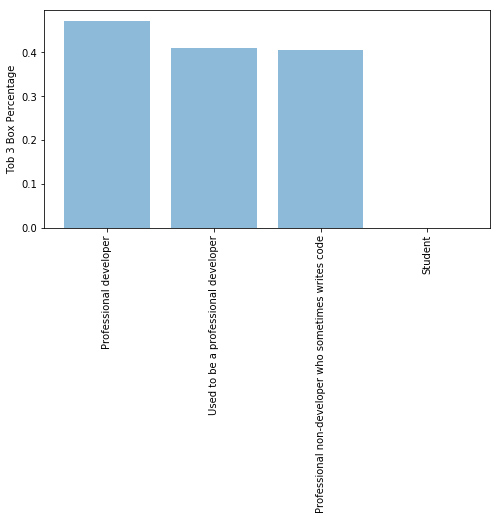

In [12]:
###this step is to visualize the top 3 box by professional
t3b_by_prof=t3b_by_prof.sort_values('top 3 box',ascending=False)

x=t3b_by_prof['Professional']
y=t3b_by_prof['top 3 box']
bar_plot(x, y,90,8)

In [13]:
######top 3 box by country
country=survey['Country'].unique()
t3b_perct_cty=[]
total_cnt_cty=[]
for i in country:
    js=survey.loc[survey['Country']==i]['JobSatisfaction'].value_counts().reset_index()
    t3b_perct_cty.append(calculate_t3b(js)[0])
    total_cnt_cty.append(calculate_t3b(js)[1])

    ###create a pandas dataframe to combine top 3 box and total count
t3b_by_cty=pd.DataFrame({'Country' : country,'top 3 box':t3b_perct_cty,'Total Count':total_cnt_cty})
###select a threshold of response counts of 500 and sort it by descending order
t3b_by_cty=t3b_by_cty[t3b_by_cty['Total Count']>500]
t3b_by_cty_top=t3b_by_cty.sort_values('top 3 box',ascending=False).head(10)

####shows the table ordered by top 3 box
x=t3b_by_cty_top['Country']
y=t3b_by_cty_top['top 3 box']
t3b_by_cty_top

,Country,top 3 box,Total Count
17,Netherlands,0.547546,652
6,Canada,0.535632,1740
31,Sweden,0.517442,516
1,United States,0.516413,9322
53,Australia,0.488467,737
7,Germany,0.483496,3181
0,United Kingdom,0.475253,3657
9,Brazil,0.467290,642
5,France,0.466070,1341
3,Poland,0.447393,1055


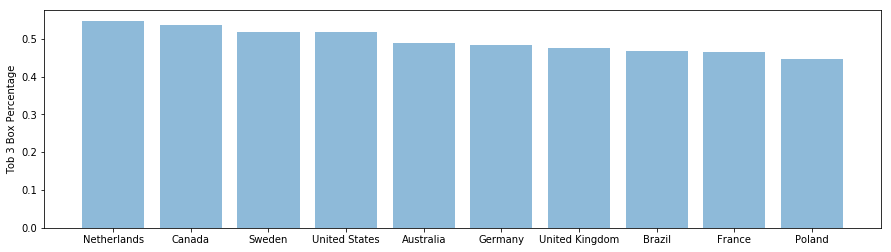

In [14]:
bar_plot(x,y,0,15)

## Step 5: Locate drivers of job satisfaction

In [15]:
#####salary drives job satisfaction?
#### clean the survey data by salary, exclude the ones with na
survey_clean = survey[survey['Salary'].notnull()]
survey_clean.shape



salary_country=[]
total_count=[]
country=survey_clean['Country'].unique()
for i in country:
    js=survey_clean.loc[survey_clean['Country']==i]['Salary'].value_counts().reset_index()
    total_count.append(js['Salary'].sum())
    salary_country.append(float(js['index'].mean()))


###set the threshold of total count and order the table by salary
salary_by_cty=pd.DataFrame({'country' : country,'average salary':salary_country,'Total Count':total_count})
salary_by_cty=salary_by_cty[salary_by_cty['Total Count']>500]
salary_by_cty_top=salary_by_cty.sort_values('average salary',ascending=False)

salary_by_cty_top


,country,average salary,Total Count
1,United States,86862.400165,3763
22,Canada,60821.543247,665
0,United Kingdom,56086.996565,1384
6,Germany,44121.321187,990
8,India,11603.472167,820


In [16]:
### find the average salary of each country which has the highest job satisfaction
salary_country=[]
top10_cty=t3b_by_cty_top['Country']
for i in top10_cty:
    js=survey_clean.loc[survey_clean['Country']==i]['Salary'].value_counts().reset_index()
    salary_country.append(float(js['index'].mean()))

salary_by_cty=pd.DataFrame({'Country' : top10_cty,'average salary':salary_country})
salary_by_cty_top=salary_by_cty.sort_values('average salary',ascending=False)
salary_by_cty_top

,Country,average salary
1,United States,86862.400165
53,Australia,67565.472028
6,Canada,60821.543247
0,United Kingdom,56086.996565
17,Netherlands,48214.555230
31,Sweden,45306.539195
7,Germany,44121.321187
5,France,41131.016087
3,Poland,21002.844611
9,Brazil,20180.091652


In [17]:
####salary by job satisfaction: top 3 box
###average salary of those who have a high job satisfaction(defined by top 3 box)
survey_clean.loc[survey_clean['JobSatisfaction']>=8,['Salary']].mean()

Salary    61339.40419
dtype: float64

In [19]:
###average salary of those who have a lower job satisfaction(rating from 1-7)
survey_clean.loc[survey_clean['JobSatisfaction'] <8,['Salary']].mean()

Salary    51772.905217
dtype: float64

We can see that developers with high job satisfaction tends to have a higher salary.

## Step 6: What is the factors developers considered when moving to the next position?

In [23]:
### clean the data by important factors
IB=survey_clean[survey_clean['ImportantBenefits'].notnull()]['ImportantBenefits']
IB.head(5)

17    Vacation/days off; Health benefits; Expected w...
22    Retirement; Annual bonus; Vacation/days off; E...
25    Retirement; Health benefits; Equipment; Profes...
34    Stock options; Annual bonus; Equipment; Profes...
52    Health benefits; Professional development spon...
Name: ImportantBenefits, dtype: object

In [28]:
###since the data is not formatted, clean the data in this step, seperate each row by ';'
IB1=IB.str.split('[;]')
IB2=[y for x in IB1 for y in x]
IB3 = [elem.lstrip() for elem in IB2]
IB3[:10]

['Vacation/days off',
 'Health benefits',
 'Expected work hours',
 'Remote options',
 'Retirement',
 'Annual bonus',
 'Vacation/days off',
 'Expected work hours',
 'Remote options',
 'Retirement']

In [29]:
#### count the number of each unique values
key=Counter(IB3).keys()
value=Counter(IB3).values()
python_dict=Counter(IB3)
IB_count=pd.DataFrame([[key,value] for key,value in python_dict.items()],columns=["Important Benefits","Counts"])
IB_count

,Important Benefits,Counts
0,Vacation/days off,5757
1,Health benefits,4455
2,Expected work hours,4288
3,Remote options,5008
4,Retirement,2658
5,Annual bonus,2983
6,Equipment,4002
7,Professional development sponsorship,3615
8,Stock options,1300
9,Child/elder care,694


## Step 7: What is the reason people decided to quit?

In [30]:
###create a function here to calculate the number of counts who select "Agree","Strongly Agree" and "Somewhat agree"
def calculate_agree_cnt(dat):
    """
    input: a dataset with a categorical variable, in this case, it is agree, strong agree, somewhat agree, disagree,
    strongly disagree.
    output: the number of counts who select "Agree","Strongly Agree" and "Somewhat agree"
    """
    agree=['Agree','Strongly agree','Somewhat agree']
    return(sum(s in agree for s in dat))

In [39]:
###calculate the count for the reason of return
Return=survey['ExCoderReturn'].reset_index(drop=True)
calculate_agree_cnt(Return)

457

In [40]:
###calculate the count for the reason of ten years
tenYears=survey['ExCoder10Years'].reset_index(drop=True)
calculate_agree_cnt(tenYears)

390

In [41]:
###calculate the count for the reason of not for me
notForMe=survey['ExCoderNotForMe'].reset_index(drop=True)
calculate_agree_cnt(notForMe)

203

In [42]:
###calculate the count for the reason of balance
balance=survey['ExCoderBalance'].reset_index(drop=True)
calculate_agree_cnt(balance)

377

In [43]:
###calculate the count for the reason of belong
belong=survey['ExCoderBelonged'].reset_index(drop=True)
calculate_agree_cnt(belong)

217

In [44]:
###calculate the count for the reason of lack of skills
skills=survey['ExCoderSkills'].reset_index(drop=True)
calculate_agree_cnt(skills)

464

In [45]:
###calculate the count for the reason of still active
active=survey['ExCoderActive'].reset_index(drop=True)
calculate_agree_cnt(active)

503

In [47]:
### calculate the total count 
total_quit_count=(calculate_agree_cnt(active)+calculate_agree_cnt(skills)+calculate_agree_cnt(belong)+calculate_agree_cnt(balance)+
calculate_agree_cnt(notForMe)+calculate_agree_cnt(tenYears)+calculate_agree_cnt(Return))

In [48]:
###calculate the perecentage of skills
calculate_agree_cnt(skills)/total_quit_count

0.17770968977403293

In [49]:
###calculate the perecentage of ten years
calculate_agree_cnt(tenYears)/total_quit_count

0.1493680582152432

In [50]:
###calculate the perecentage of return
calculate_agree_cnt(Return)/total_quit_count

0.17502872462657987